<a href="https://colab.research.google.com/github/Mann1903/Android-Slot-Machine-Game-demo/blob/main/Moto_Imagery%20Classification%20using%20Deep%20Learning%20Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
filename = "/content/drive/MyDrive/BCICIV_2a_gdf/A03T.gdf"
raw = mne.io.read_raw_gdf(filename)
print("Information",raw.info)
print("########################################################")
print(raw.ch_names)

Extracting EDF parameters from /content/drive/MyDrive/BCICIV_2a_gdf/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Information <Info | 8 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2004-11-09 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
 subject_info: 4 items (dict)
>
########################################################
['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', '

/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [ ]:
# Find events using mne.events_from_annotations for GDF files
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


In [ ]:
print("Events array>>>>>>",events)
print("#######################################################################")
print("Event ID array>>>>>>",event_id)

Events array>>>>>> [[     0      0      5]
 [     0      0      3]
 [ 23720      0      5]
 ...
 [656993      0      7]
 [658552      0      6]
 [659052      0      9]]
#######################################################################
Event ID array>>>>>> {'1023': 1, '1072': 2, '276': 3, '277': 4, '32766': 5, '768': 6, '769': 7, '770': 8, '771': 9, '772': 10}


In [ ]:
# Assuming 'events' has the structure: [[timestamp, 0, event_code], ...]
event_times = events[:, 0]  # Event timestamps
event_codes = events[:, 2]  # Event codes
print("Event timestamp>>>>>>>>>>>>>>>",event_times)
print("###########################################################")
print("Event codes occuring>>>>>>>>>>>",event_codes)

Event timestamp>>>>>>>>>>>>>>> [     0      0  23720  23720  57692  57692  79520  79870  80370  81873
  82373  83791  84291  85743  86243  87751  88251  89862  90362  91779
  92279  93829  94329  95760  96260  97758  98258  99664 100164 101559
 102059 103531 104031 105475 105975 107442 107942 109562 110062 111570
 112070 113636 114136 115672 116172 117738 118238 119808 120308 121888
 122388 123800 124300 125831 126331 127784 128284 129745 130245 131849
 131849 132349 133853 134353 135828 135828 136328 137854 137854 138354
 139925 140425 142032 142532 144124 144624 146215 146715 148258 148758
 150322 150822 152342 152842 154314 154814 156277 156777 158202 158702
 160283 160783 162261 162761 164251 164751 166370 166870 168276 168776
 170204 170704 172318 172818 174377 174877 176355 176705 177205 178708
 179208 180626 181126 182578 183078 184586 185086 186697 187197 188614
 189114 190664 191164 192595 193095 194593 194593 195093 196499 196999
 198394 198894 200366 200866 202310 202810 204

In [ ]:
# events = (np.vstack((events[1],events[3],events[2]))).T

In [ ]:
# print(events)

In [ ]:
print("Unique event codes in the events array:", np.unique(events[:, 2]))

Unique event codes in the events array: [ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
# Pre-load the data
raw.load_data()
# Filter the raw signal with a band pass filter in 7-35 Hz
raw.filter(7., 35., fir_design='firwin')
# Remove the EOG channels and pick only desired EEG channels
raw.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False,exclude='bads')

Reading 0 ... 660529  =      0.000 ...  2642.116 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


In [ ]:
# Directly use the values from event_id
event_id = dict(left_hand = 7,right_hand = 8,foot = 9,tongue = 10)
# Extracts epochs of 3s time period from the datset into 288 events for all 4 classes
tmin, tmax = 1., 4.
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks, baseline=None, preload=True)

Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 751 original time points ...
0 bad epochs dropped


In [ ]:
print(event_id)

{'left_hand': 7, 'right_hand': 8, 'foot': 9, 'tongue': 10}


<Evoked | 'left_hand' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


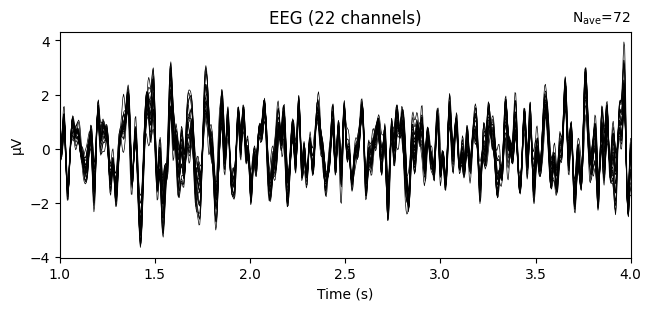

<Evoked | 'right_hand' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


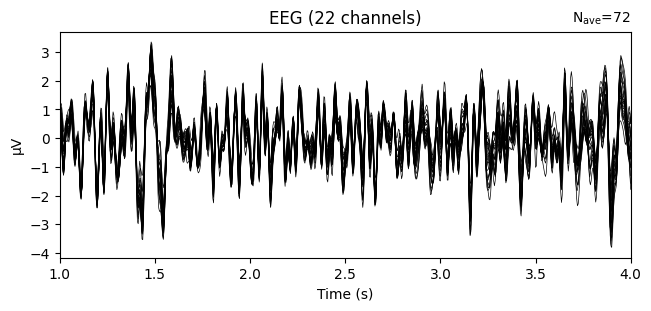

<Evoked | 'foot' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


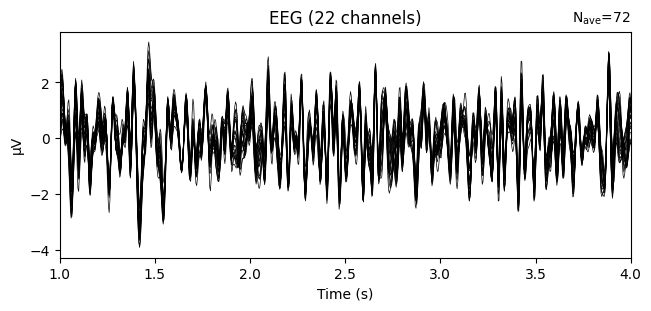

<Evoked | 'tongue' (average, N=72), 1 – 4 s, baseline off, 22 ch, ~156 kB>


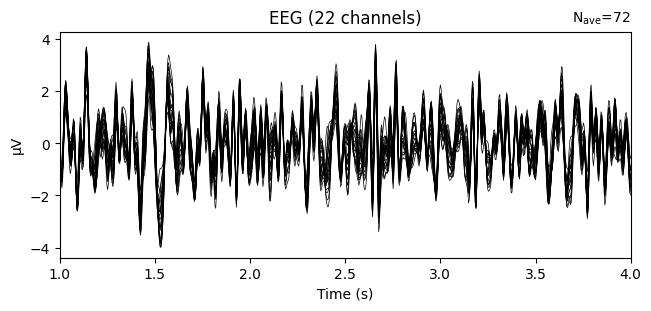

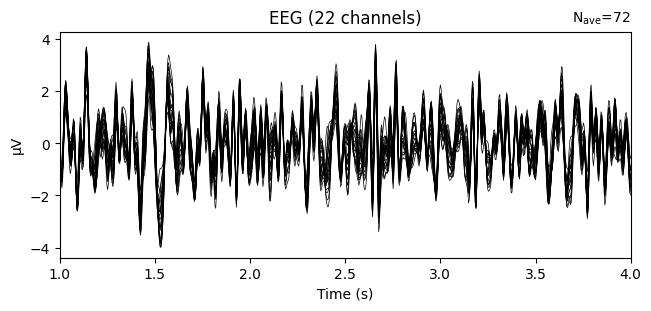

In [ ]:
# Left hand epoch average plot
evoked = epochs['left_hand'].average()
print(evoked)
evoked.plot(time_unit='s')
# Right hand epoch average plot
evoked = epochs['right_hand'].average()
print(evoked)
evoked.plot(time_unit='s')
# Foot epoch average plot
evoked = epochs['foot'].average()
print(evoked)
evoked.plot(time_unit='s')
# Tongue epoch average plot
evoked = epochs['tongue'].average()
print(evoked)
evoked.plot(time_unit='s')

In [ ]:
Labels = epochs.events[:,-1] - 769 + 1
Data = epochs.get_data()
import pywt
# signal is decomposed to level 5 with 'db4' wavelet
def wpd(X):
  coeffs = pywt.WaveletPacket(X,'db4',mode='symmetric',maxlevel=5)
  return coeffs

def feature_bands(x):
 Bands = np.empty((8,x.shape[0],x.shape[1],30)) # 8 freq band coefficients are chosen from the range 4-32Hz
 for i in range(x.shape[0]):
  for ii in range(x.shape[1]):
    pos = []
    C = wpd(x[i,ii,:])
    pos = np.append(pos,[node.path for node in C.get_level(5,'natural')])
    for b in range(1,9):
      Bands[b-1,i,ii,:] = C[pos[b]].data
 return Bands

In [ ]:
wpd_data = feature_bands(Data)

In [ ]:
print(wpd_data)

[[[[-3.59129854e-08  7.97894462e-08  3.64455879e-06 ...  4.04670168e-06
     1.53683297e-05  1.42063150e-05]
   [ 6.43231076e-08  2.60018967e-07  3.12254600e-07 ...  6.20834820e-06
     1.17676696e-05  1.13730735e-05]
   [ 8.22985291e-08  2.43791818e-07 -1.04473361e-06 ...  1.22038333e-05
     1.46775661e-05  1.37507096e-05]
   ...
   [ 1.49655345e-07  3.26157754e-07 -2.00127837e-06 ...  2.44779676e-05
     1.14794314e-05  5.09307666e-06]
   [ 1.79688115e-07  4.24412603e-07 -1.52122786e-06 ...  2.35513210e-05
     1.41773708e-05  2.52689581e-06]
   [ 1.26934091e-08 -3.01228009e-07 -2.81137050e-06 ...  2.50122135e-05
     1.34942713e-05  4.52596092e-06]]

  [[ 1.97696129e-07  7.88061288e-07 -7.61047591e-08 ... -1.97773195e-06
     1.13350906e-05 -7.37632545e-07]
   [ 1.64005664e-07  5.85593555e-07 -4.82370581e-07 ...  1.39194320e-06
     4.39209020e-06 -4.63163074e-06]
   [ 1.88756931e-07  7.41627760e-07  4.35412240e-07 ...  6.58573584e-07
     5.24828675e-06 -3.94461100e-06]
   ...
   

In [ ]:
from mne.decoding import CSP # Common Spatial Pattern Filtering
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from sklearn.model_selection import ShuffleSplit
# OneHotEncoding Labels
enc = OneHotEncoder()
X_out = enc.fit_transform(Labels.reshape(-1,1)).toarray()
# Cross Validation Split
cv = ShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
acc = []
ka = []
prec = []
recall = []
for train_idx, test_idx in cv.split(Labels):
  Csp = [];ss = [];nn = [] # empty lists

  label_train, label_test = Labels[train_idx], Labels[test_idx]
  y_train, y_test = X_out[train_idx], X_out[test_idx]

 # CSP filter applied separately for all Frequency band coefficients

  Csp = [CSP(n_components=4, reg=None, log=True, norm_trace=False) for _ in range(8)]
  ss = preprocessing.StandardScaler()
  X_train = ss.fit_transform(np.concatenate(tuple(Csp[x].fit_transform(wpd_data[x,train_idx,:,:],label_train)
            for x in range(8)),axis=-1))
  X_test = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_data[x,test_idx,:,:])
          for x in range(8)),axis=-1))

Computing rank from data with rank=None
    Using tolerance 2.4e-05 (2.2e-16 eps * 22 dim * 4.9e+09  max singular value)
    Estimated rank (data): 22
    data: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating class=-761 covariance using EMPIRICAL
Done.
Estimating class=-760 covariance using EMPIRICAL
Done.
Estimating class=-759 covariance using EMPIRICAL
Done.
Estimating class=-758 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.2e-05 (2.2e-16 eps * 22 dim * 4.5e+09  max singular value)
    Estimated rank (data): 22
    data: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating class=-761 covariance using EMPIRICAL
Done.
Estimating class=-760 covariance using EMPIRICAL
Done.
Estimating class=-759 covariance using EMPIRICAL
Done.
Estimating class=-758 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using toleranc

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import AveragePooling1D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings

In [ ]:
X_train.shape

(201, 32)

In [ ]:
y_train.shape

(201, 4)

In [ ]:
X_test.shape

(87, 32)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape

(201, 32, 1)

In [ ]:
!pip install Merge

  Preparing metadata (setup.py) ... done
  Created wheel for Merge: filename=merge-1.0.0-py3-none-any.whl size=1465 sha256=5f5fb30817b6c8a915ab917f43ff66c0f472c2fce249273efe61c7d662b9504e
  Stored in directory: /root/.cache/pip/wheels/05/dd/d8/def14d2e509c76947b5c561b30a68602ebdbb6d4c985618743
Successfully built Merge


In [ ]:
from keras.layers import LSTM,Concatenate, Input
from tensorflow.keras.models import Model

# Define input layers for both models
input1 = Input(shape=(32,1))
input2 = Input(shape=(32,1))

# Model 1
x1 = Conv1D(32, (5), activation='relu')(input1)
x1 = Conv1D(64, (3), activation='relu')(x1)
x1 = Conv1D(128, (3), activation='relu')(x1)
x1 = Conv1D(256, (3), activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dense(64, activation='relu')(x1)
output1 = Dense(4, activation='softmax')(x1)

# Model 2
x2 = Conv1D(32, (5), activation='relu')(input2)
x2 = MaxPooling1D(pool_size=(1))(x2)
x2 = Conv1D(64, (3), activation='relu')(x2)
x2 = MaxPooling1D(pool_size=(1))(x2)
x2 = Conv1D(128, (3), activation='relu')(x2)
x2 = MaxPooling1D(pool_size=(1))(x2)
x2 = Conv1D(256, (3), activation='relu')(x2)
x2 = MaxPooling1D(pool_size=(1))(x2)
x2 = Flatten()(x2)
x2 = Dense(128, activation='relu')(x2)
x2 = Dense(64, activation='relu')(x2)
output2 = Dense(4, activation='softmax')(x2)

# Merge the outputs of the two models
merged = Concatenate()([output1, output2])

# final layer
z = Dense(4, activation="softmax")(merged)

# Create the final model
model = Model(inputs=[input1, input2], outputs=z)

model.compile(optimizer='RMSProp',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 32, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 28, 32)         │            192 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 28, 32)         │              0 │ conv1d_4[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 26, 64)         │          6,208 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer (InputLayer)  │ (None, 32, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 26, 64)         │              0 │ conv1d_5[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 28, 32)         │            192 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 24, 128)        │         24,704 │ max_pooling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 26, 64)         │          6,208 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 24, 128)        │              0 │ conv1d_6[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 24, 128)        │         24,704 │ conv1d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 22, 256)        │         98,560 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 22, 256)        │         98,560 │ conv1d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 22, 256)        │              0 │ conv1d_7[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 5632)           │              0 │ conv1d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 5632)           │              0 │ max_pooling1d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │        721,024 │ flatten[0][0]          │
├──────────────────────

 Total params: 1,718,444 (6.56 MB)

 Trainable params: 1,718,444 (6.56 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit([X_train,X_train],y_train,validation_data=([X_test,X_test],y_test),
 batch_size=10, epochs=70, )

Epoch 1/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 456ms/step - accuracy: 0.3468 - loss: 1.2870 - val_accuracy: 0.4138 - val_loss: 1.1653
Epoch 2/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6692 - loss: 1.0421 - val_accuracy: 0.7126 - val_loss: 1.0090
Epoch 3/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8449 - loss: 0.8845 - val_accuracy: 0.4483 - val_loss: 1.1378
Epoch 4/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8062 - loss: 0.8357 - val_accuracy: 0.7126 - val_loss: 1.0132
Epoch 5/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9050 - loss: 0.7920 - val_accuracy: 0.7241 - val_loss: 0.9448
Epoch 6/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9290 - loss: 0.7764 - val_accuracy: 0.8046 - val_loss: 0.8724
Epoch 7/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9341 - loss: 0.7461 - val_accuracy: 0.7931 - val_loss: 0.8662
Epoch 8/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9593 - loss: 0.6583 - val_accuracy: 0.7241 -

In [ ]:
# Make predictions
y_pred = model.predict([X_test,X_test])

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Predicted classes by model are>>>>>>>>>>>>>>",y_pred_classes)
print("#########################################################")
print("Original Classes of test samples from dataset are>>>>>>>>>>>>>>>>>",y_test_classes)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 616ms/step
Predicted classes by model are>>>>>>>>>>>>>> [0 1 2 3 0 1 0 2 2 0 1 1 0 3 2 1 3 1 2 1 1 0 0 1 1 1 1 0 0 2 0 2 2 1 1 3 2
 1 0 1 1 1 2 1 2 2 3 1 3 2 2 2 1 1 2 3 1 0 0 2 3 0 3 2 3 3 3 0 0 2 0 3 3 1
 0 3 2 2 1 0 1 0 1 0 1 3 1]
#########################################################
Original Classes of test samples from dataset are>>>>>>>>>>>>>>>>> [1 1 2 3 0 1 0 2 2 0 1 1 0 3 2 1 3 1 2 1 1 0 0 1 1 1 1 0 0 2 0 2 2 1 1 3 2
 0 0 1 1 3 3 1 2 0 2 1 3 2 3 2 1 1 2 3 1 2 0 0 3 3 1 2 0 3 3 0 0 2 2 3 3 1
 0 2 2 2 1 0 2 0 1 0 0 3 1]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy}')

# Calculate precision
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
print(f'Precision: {precision}')

# Calculate recall
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
print(f'Recall: {recall}')

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test_classes, y_pred_classes)
print(f"Cohen's Kappa: {kappa}")

Accuracy: 0.8160919540229885
Precision: 0.8148840194024499
Recall: 0.8160919540229885
Cohen's Kappa: 0.7516946129147343


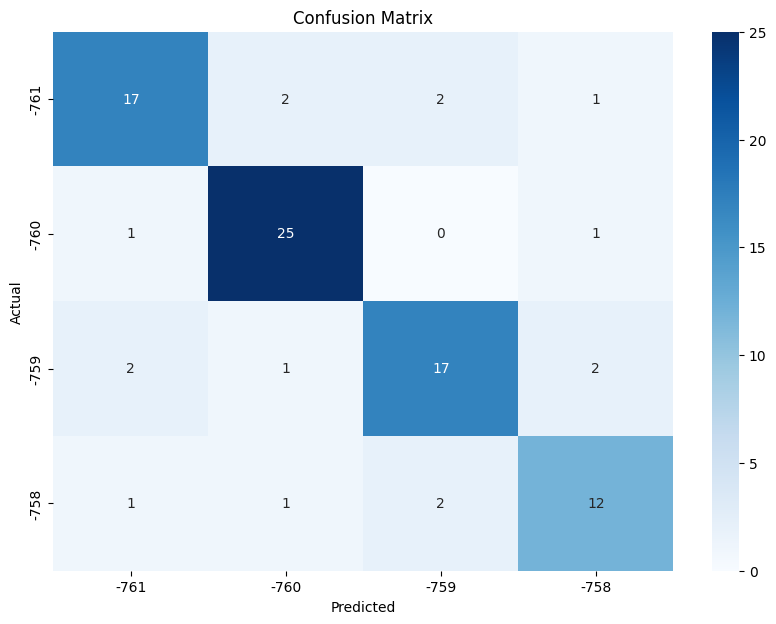

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=enc.categories_[0], yticklabels=enc.categories_[0])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

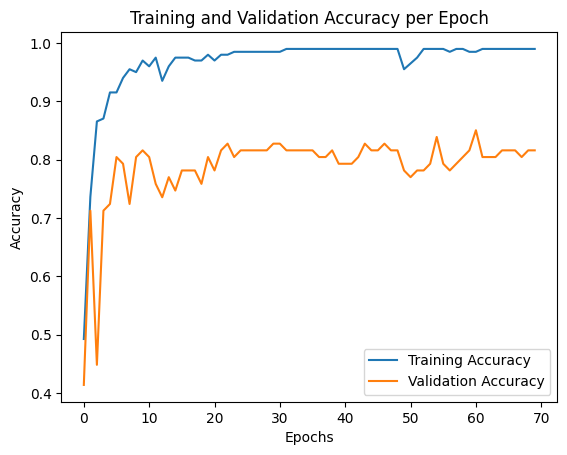

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy per Epoch')
plt.show()

F1 Score (macro): 0.8060631229235881
AUC Score (macro): 0.9315835274315322


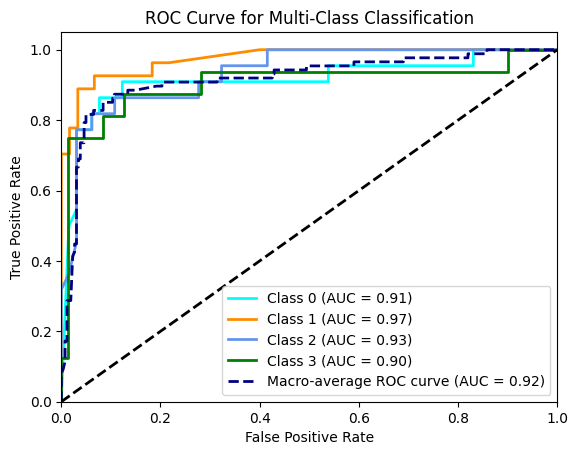

In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np

# One-hot encode the true labels for multi-class ROC and AUC
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# F1 score
f1 = f1_score(y_true, y_pred_classes, average='macro')
print("F1 Score (macro):", f1)

# ROC and AUC for multi-class classification
# Using One-hot encoding for multi-class
y_test_bin = label_binarize(y_true, classes=np.arange(y_train.shape[1]))
y_pred_bin = label_binarize(y_pred_classes, classes=np.arange(y_train.shape[1]))

# AUC score
roc_auc = roc_auc_score(y_test_bin, y_pred, average="macro", multi_class="ovr")
print("AUC Score (macro):", roc_auc)

# ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
n_classes = y_train.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# ROC curves for each class
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'yellow', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc_dict[i]:.2f})')

# ROC curve for macro-average
fpr["macro"], tpr["macro"], _ = roc_curve(y_test_bin.ravel(), y_pred.ravel())
roc_auc_macro = auc(fpr["macro"], tpr["macro"])
plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='--',
         label=f'Macro-average ROC curve (AUC = {roc_auc_macro:.2f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()